# 🧪 Setting the Research Goal
---
Creating a model for book recommendations.

# 📥 Retrieving Data
---
The data was obtained from Kaggle<br>
Link for the dataset:
&nbsp;https://www.kaggle.com/datasets/ruchi798/bookcrossing-dataset

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

Importing the datasets

In [5]:
df_books = pd.read_csv("archive/Book reviews/Book reviews/BX_Books.csv", encoding="ISO-8859-1", delimiter=";")
df_books_rating = pd.read_csv("archive/Book reviews/Book reviews/BX-Book-Ratings.csv", encoding="ISO-8859-1", delimiter=";")
df_users = pd.read_csv("archive/Book reviews/Book reviews/BX-Users.csv", encoding="ISO-8859-1", delimiter=";")

Based on initial overiview of the data (displaying the first few records of the dataset), we are removing 'Image-URL-S', 'Image-URL-M' and 'Image-URL-L', because they are redundant.

# 🛠 Data Preparation & 🕵️ Data Exploration
---

In [8]:
df_books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], inplace=True)

In [9]:
df_books_rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [11]:
df_books_rating.shape[0]

1149780

Joining the 'User' and 'Book-Rating' datasets on 'User-ID' as the leading column, and then using 'ISBN' to join the 'Books' dataset to the already merged one.

In [13]:
merged_df = df_users.merge(df_books_rating, on='User-ID', how='inner')
merged_df

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",NaN,034542252,0
2,8,"timmins, ontario, canada",NaN,0002005018,5
3,8,"timmins, ontario, canada",NaN,0060973129,0
4,8,"timmins, ontario, canada",NaN,0374157065,0
...,...,...,...,...,...
1149775,278854,"portland, oregon, usa",NaN,0425163393,7
1149776,278854,"portland, oregon, usa",NaN,0515087122,0
1149777,278854,"portland, oregon, usa",NaN,0553275739,6
1149778,278854,"portland, oregon, usa",NaN,0553578596,0


In [14]:
df = merged_df.merge(df_books, on='ISBN', how='inner')
df

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,8,"timmins, ontario, canada",NaN,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,8,"timmins, ontario, canada",NaN,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,8,"timmins, ontario, canada",NaN,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton & Company
...,...,...,...,...,...,...,...,...,...
1031170,278854,"portland, oregon, usa",NaN,0425163393,7,Kat Scratch Fever (Kat Colorado Mysteries),Karen Kijewski,1998,Berkley Publishing Group
1031171,278854,"portland, oregon, usa",NaN,0515087122,0,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990,Jove Books
1031172,278854,"portland, oregon, usa",NaN,0553275739,6,In Her Day,Rita Mae Brown,1988,Bantam Books
1031173,278854,"portland, oregon, usa",NaN,0553578596,0,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000,Bantam


Chechking to see for NaN values. In the case for column 'Book-Author' and 'Publisher' we are going to drop the rows with NaN values, because there are only 2 missing values in each, and also because in these two columns the records are non-numeric and the this also makes the imputation difficult.

In [16]:
df.isnull().sum()

User-ID                     0
Location                    0
Age                    277845
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 2
Year-Of-Publication         0
Publisher                   2
dtype: int64

In [17]:
df.dropna(subset=['Book-Author', 'Publisher'], inplace=True)
df.isnull().sum()

User-ID                     0
Location                    0
Age                    277845
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 0
Year-Of-Publication         0
Publisher                   0
dtype: int64

We then use summary statistics for a quick overview of the data in the 'Age' column. As we can see that there are a few issues with the records in this column, the 'min' age is 0 (records which are invalid) and the 'max' is 244 (records that are outliers), whcih we know that this is not possible. We can also tell that the data has a 'Normal Distribution' based on the mean value in corellation with the median (37.4 ≈ 35).

In [19]:
print(df['Age'].describe())

count    753326.000000
mean         37.397707
std          14.098197
min           0.000000
25%          28.000000
50%          35.000000
75%          45.000000
max         244.000000
Name: Age, dtype: float64


We will check to see if there are any inconsistencies in the user dataset for the 'Age' feature.

In [95]:
age_check = df_users.groupby('User-ID')['Age'].nunique()
inconsistent_users = age_check[age_check > 1]

print(f"Number of users with inconsistent age values: {len(inconsistent_users)}")
print(inconsistent_users.head(20))

Number of users with inconsistent age values: 0
Series([], Name: Age, dtype: int64)


We will use a box-plot to see the outliers. And as we can see in the graph there are alot of oultiers (greater than 100).

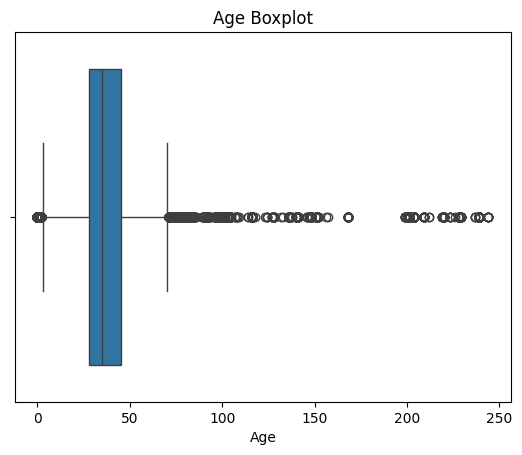

In [21]:
sns.boxplot(x=df['Age'])
plt.title('Age Boxplot')
plt.show()

The box-plot confirmed extreme outliers, so we will handle this by first findinf the IQR (Interquartile Range)

In [23]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 2.5, Upper Bound: 70.5


The upper bound is a reasonable cutoff, but the lower bound is not reasonable, beacause it is not possible for a 2 year old to read a book and leave a review. For this reason, my thought process was to use the upper bound cutoff and use either KNN or Linear Regression to impute the values instead of the lower bound cutoff. For both KNN and Linear Regression we need other features to be able to impute, so we first need to see the correlations between 'Age' and other features in the dataset.

In [25]:
filtered_df = merged_df[merged_df['Book-Rating'] > 0]

user_df = filtered_df.groupby('User-ID', as_index=False).agg({
    'Age': lambda x: x.median() if len(x.dropna()) > 0 else np.nan,
    'Book-Rating': ['mean', 'std', 'count'],
})

user_df.columns = ['User-ID', 'Median_Age', 'Avg_Rating', 'Rating_Std', 'Num_Reviews']

filtered_users = user_df[user_df['Num_Reviews'] >= 5]

print(filtered_users.shape)
print(filtered_users.head(20))


(14220, 5)
     User-ID  Median_Age  Avg_Rating  Rating_Std  Num_Reviews
0          8         NaN    5.571429    0.786796            7
34        99        42.0    7.625000    2.326094            8
39       114        57.0    8.125000    1.552648            8
45       160        20.0    7.333333    0.816497            6
52       183        27.0    8.000000    1.054093           91
64       232        16.0    6.200000    1.483240            5
66       242        37.0    8.545455    1.582935           33
67       243         NaN    7.277778    1.708303           18
68       244         NaN    7.625000    1.187735            8
71       254        24.0    7.775862    1.499042           58
81       300         NaN    5.500000    1.414214            8
101      383         NaN    7.500000    2.672612            8
102      387        17.0    7.200000    3.271085            5
103      388        35.0    7.294118    2.023756           17
104      392        44.0    6.809524    1.806074           

In [26]:
filtered_users.shape[0]

14220

In [27]:
merged_df = merged_df.merge(df[['ISBN', 'Book-Author']], on='ISBN', how='left')

In [28]:
merged_df.head(20)

,User-ID,Location,Age,ISBN,Book-Rating,Book-Author
0,2,"stockton, california, usa",18.0,0195153448,0,Mark P. O. Morford
1,7,"washington, dc, usa",NaN,034542252,0,NaN
2,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
3,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
4,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
5,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
6,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
7,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
8,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright
9,8,"timmins, ontario, canada",NaN,0002005018,5,Richard Bruce Wright


In [29]:
print(user_df[['Median_Age', 'Num_Reviews', 'Avg_Rating']].corr())

             Median_Age  Num_Reviews  Avg_Rating
Median_Age     1.000000     0.009506   -0.008434
Num_Reviews    0.009506     1.000000    0.010966
Avg_Rating    -0.008434     0.010966    1.000000


In [30]:
le = LabelEncoder()
merged_df['Author_ID'] = le.fit_transform(merged_df['Book-Author'])

print(merged_df[['Age', 'Author_ID']].corr())

                Age  Author_ID
Age        1.000000  -0.023142
Author_ID -0.023142   1.000000


The correlation between 'Age' and other feature columns was not good at all, as we can see above the highest correlation value was -0.023 which is not a strong correlation.

So, based on the above my next thought process was to check for natural cutoffs based on the frequency distribution. We can observe from the list bellow that the best lower bound cutoff would be 9 and the upper bound cutoff would be 75, because we can see that the number of occurences from starts to pick up at 9 and starts to fall off at 75. 

In [33]:
age_counts = df['Age'].value_counts().sort_index()
for age, count in age_counts.items():
    print(f"Age: {age}, Count: {count}")

Age: 0.0, Count: 561
Age: 1.0, Count: 428
Age: 2.0, Count: 321
Age: 3.0, Count: 143
Age: 4.0, Count: 271
Age: 5.0, Count: 159
Age: 6.0, Count: 14
Age: 7.0, Count: 148
Age: 8.0, Count: 542
Age: 9.0, Count: 2056
Age: 10.0, Count: 227
Age: 11.0, Count: 513
Age: 12.0, Count: 747
Age: 13.0, Count: 1243
Age: 14.0, Count: 3206
Age: 15.0, Count: 3165
Age: 16.0, Count: 3299
Age: 17.0, Count: 5282
Age: 18.0, Count: 8747
Age: 19.0, Count: 5247
Age: 20.0, Count: 6487
Age: 21.0, Count: 10064
Age: 22.0, Count: 12101
Age: 23.0, Count: 18793
Age: 24.0, Count: 18572
Age: 25.0, Count: 21768
Age: 26.0, Count: 22106
Age: 27.0, Count: 22282
Age: 28.0, Count: 25967
Age: 29.0, Count: 30647
Age: 30.0, Count: 27202
Age: 31.0, Count: 25965
Age: 32.0, Count: 26492
Age: 33.0, Count: 32864
Age: 34.0, Count: 25893
Age: 35.0, Count: 19573
Age: 36.0, Count: 26097
Age: 37.0, Count: 21119
Age: 38.0, Count: 22396
Age: 39.0, Count: 17003
Age: 40.0, Count: 15521
Age: 41.0, Count: 15901
Age: 42.0, Count: 10760
Age: 43.0, C

In [34]:
print(merged_df.shape[0])

55589042


In [ ]:
df['Age'] = df['Age'].apply(lambda x: x if 9 <= x <= 75 else np.nan)

print(df['Age'].describe())
print(df['Age'].isna().sum())

In [85]:
df = df.dropna(subset=['Age'])
print(df.shape)

(746049, 9)


In [87]:
df.isnull().sum()

User-ID                0
Location               0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

As we can see now we have dropped 285122 rows. Previously we saw that there were 277845 NaN values in the 'Age' column, and after we did the filtering we can see that there were 7,277 outliers that did not fit in the cutoffs.

Next we are going to deal with the missing values in Book-Rating, because 0 is not a valid value.

In [37]:
df['Book-Rating'].max()

10

In [38]:
len(df_books_rating['Book-Rating'])

1149780

In [39]:
df_books_rating['Book-Rating'].value_counts()[0]

716109

In [40]:
len(df_users)

278858

# 🏗 Data Modeling
---